## **What is Classification ?**

Classification involves deciding whether a sample is part of one class or another **(binary classification) i.e it is either yes or No**.

If there are multiple class options, it's reffered to as **multi-class classification**

## **1. Going through the 6 step ML framework**

### **1.1 Problem Definition**
In our case, the problem we will be exploring is **binary classification** (a sample can only be one or two things).

In summary our problem statement can be thus,

*Given clinical parameter about a patient, can we predict whether or not they have heart disease ?*

### **1.2 What data are we using ?**

* The original data came from the Cleveland database from UCI Machine Learning Repository.
However, we've downloaded it in a formatted way from Kaggle.

* The original database contains 76 attributes, but only 14 attributes **(also called features)** will be used to predict our **target variable.**

**NB:** Atrributes and features are also referred to as **independent variables** while the target varable can be referred to as **dependent variable**

**NB:** We use the independent variable(s) to predict our dependent variable(s)

* In our case, The independent variables are a patient's different medical attributes and the dependent variable is **whether or not they have heart disease.**

### 1.3 How will we evaluate our model?

An evaluation metric is something you would normally define at the start of the a project. However since machine learning is experimental it can change over time during the cause of the project. To begin a project you say something like:

***If we can reach a 95% accuracy level at predicting whether or not a patient has heart disease we'll pursue this project***

The reason this is helpful is that it provides a rough goal for the machine learning engineer or data scientist to work towards. Finally, this goal/threashold can be adjusted as the project progresses and get tested in the real world.

### 1.4 Which features of the data will be important to us?

Features are different parts and characteristics of the data. At this satge you will explore what each portion of the data relates to and then create a reference you can use to look up later on.

One of the most common ways to do this is to create a **data dictionary.**

A data dictionary describes the data you are dealing with. Not all datasets may come with them so this is where you may have to do some extra research or consult an **Expert in the subject** for guidiance.

The following features will be used to predict our target variable (heart disease or no heart disease) in our project:

***age*** - Age in years

***sex*** - 1 = male, 0 = female

***cp*** - chest pain type

***trestbps*** - resting blood pressure (in mm Hg on admission to the hospital)

***chol*** - serum cholestsrol in mg/dl

***fbs*** - fasting blood sugar > 120mg/dl (1 = true, 0 = false)

***restecg*** - Resting electrocardiographic results

***thalach*** - Maximum heart rate achieved

***exang*** - Exercise induced angina (1 = true; 0 = false)

***oldpeak*** - ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest

***slope*** - The slope of the peak exercise ST segment

***ca*** - Number of major vessels (0-3) coloured by flouroscopy

***thal*** - Thelium stress result, 1:Normal, 2:Normal, 6:Fixed defect, 7:Reversible defect

***target*** - Have disease or not (1 = yes; 0 = no)

**NB:** No personal identifiable information (PPI) can be found in the dataset.

It's good idea to save these to a python dictionary or in an external file, so we can look at them later without comming back here.


## 2. Preparing the tools

It is custom to see the required libraries imported in a big chunk in the beginnig of the project as will be done below.

However, in starting a new project you may import the required libraries as you go. Since, you may not know what you need ahead of time.

But, it is important to consolidate every library you have used at the top of your note book once you are done. This will makes your work look professional and tidy.

The libraries you use require may defer form project to project. But there are a few libraries that are use in most projects, they are:

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization. 
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.


In [2]:
# Regular EDA and plotting libraries
import numpy as np # np is a short form for numpy

import pandas as pd # pandas is so commonly used, it's shortened to pd

import matplotlib
import matplotlib.pyplot as plt # A convetional way of writting matplot.pyplot library is plt

import seaborn as sns # seaborn gets shortened to sns

## Models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# from sklearn.metrics import "plot_roc_curve" # note: this was changed in Scikit-Learn 1.2
# and above to be "RocCurveDisplay" as can be seen below.
from sklearn.metrics import RocCurveDisplay

# print last updated.
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# print versions of libraries we're using.
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-02-12 13:01:08.851579

Numpy version: 1.26.4
Pandas version: 2.2.3
matplotlib version: 3.10.0
Scikit-Learn version: 1.6.1


## 3. Loading Data

There are many different ways to store data. One typical way of storing **tabular data,** is in the **.csv** format or CSV format (Command Delinated). 

[CSV](https://en.wikipedia.org/wiki/Comma-separated_values) stands for Command Separated Values. Other common formats includes [JSON](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON), [SQL](https://en.wikipedia.org/wiki/SQL), [parquet](https://parquet.apache.org/).

Pandas has a buit-in function called `read_csv()` which takes the file pathname of your `.csv file`. Finally, the CSV format is good for smaller datasets but may face some speed issues when working with larger datasets.

In [4]:
df = pd.read_csv("heart-disease.csv") # To read file from a local repository after importing it to your IDU.

#df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
# The above can be used to read a file via a URL.

df.head(10) # To print the first ten rows of the Data set.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## 4. Data Exploration (exploratory data analysis or EDA)

There is no set way of doing this but what you should aim at doing here is to becaome more and more familiar with the dataset. Compare different columns to each other, and compare them to the target variable.

This is important because it gives more insight into the dataset and also helps you dictate the:

* **Overfitting** i.e when a model is performing to well i.e memorizing rather than learning generilized patterns.

* **Underfitting** i.e when a model is not learning patterns in the data. Hence, underperforming.

##### ***Since EDA has no set methodolgy, the following is a short check list you might want to walk through:***

1. What question are you triying to solve or prove wrong ?
2. What kind of data do you have and how are you treat different types ?
3. What's missing from the data and how do you intend to deal with it ?
4. Where are the outliers and while should you care about them ?
5. How can you add, change and remove features to get more out the data ?

Finally, calling the `head()` function on a dataframe will print the top 5 rows while, the `tail()` function will print the botton 5 of the dataframe. You can pass a number like `head(10)` to show the top 10 rows, just like we did above.

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


`value_count()` function allows you to show how many times each of the values of a categorical column appear.

In [11]:
# let use the value_count() function to see how many times positive(1) and negative(0) appears in our DataFrame
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

Since these two values are close to even, our `target` column can be considered **balanced**.

An **unbalanced** target column, means some classes have far more samples, this can be harder to model than a balanced set. In an ideal world all of your target classes have the same number of samples.

If you'd prefer to get this values in percentages, `value_counts()` takes a parameter, `normalize` which is set to true.

In [12]:
# Normalize value counts for our "target" feature.
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

We can plot the **target column** value counts by calling the `plot()` function and telling it what kind of plot we'd like and how we want it to look, we can pass our customized specificcation as a parameter in the `plot()` function as can be seen below. In this case we use the Bar Chart with some specified color.

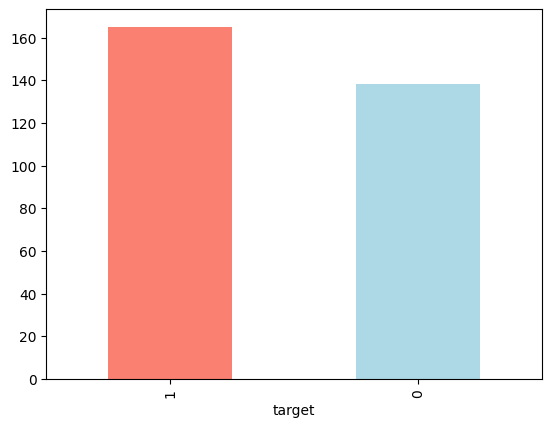

In [14]:
# plot the value counts with a bar graph or chart.
df.target.value_counts().plot(kind="bar", color=["salmon","lightblue"]);

`pd.DataFrame.info()` shows a quick insight into the number of missing vaalues you have and what type of data you're working with.

In our case there are no missing values and all our columns are numerical in nature.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another way to get quick Insights into your DataFrame is to use `pd.DataFrame.describe()`.

The `describe()` function shows a range of different metrics or summary statistics about your numerical columns such as mean, max and standard deviation.

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4.1 Comparing one feature to another

If you want to compare two columns to each other, you can use the function `pd.crosstab(index, columns)`. 

This is helpful if you want to start gaining intuition about how your independent variable interact with your dependent varaibles.

Let's begin by comparing our target column with the sex column.

Remember that, from our data dictionary;

* That, in the **target colunmn**, 1 = heart disease present & 0 = no heart disease.
* And in the **sex column**, 1 = male & 0 = female. 

In [20]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

There are 207 males and 96 females in our study. which is not very balanced relative to the target.

What if we compared the target column values with the sex column values ? 

In [21]:
# Compare target column with sex column
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93
